In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import needed libraries
import seaborn as sns

In [19]:
#reading the data 
da = pd.read_sas(r'MGX_H.XPT')

Lets just quickly visualize the missing data

<Axes: >

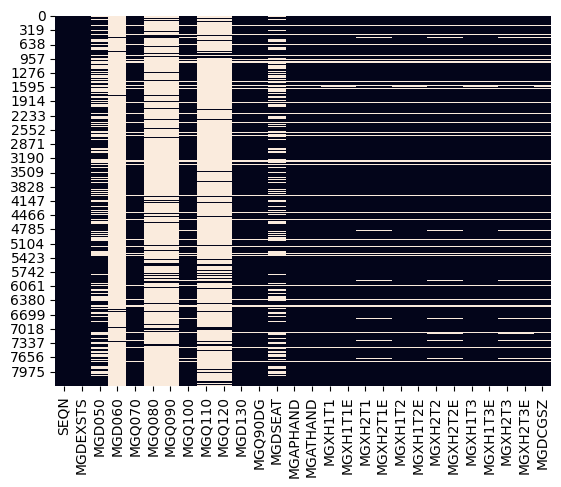

In [20]:
sns.heatmap(da.isnull(), cbar = False)

In [21]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8291 entries, 0 to 8290
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8291 non-null   float64
 1   MGDEXSTS  8291 non-null   float64
 2   MGD050    5211 non-null   float64
 3   MGD060    192 non-null    float64
 4   MGQ070    7751 non-null   float64
 5   MGQ080    941 non-null    float64
 6   MGQ090    941 non-null    float64
 7   MGQ100    7752 non-null   float64
 8   MGQ110    755 non-null    float64
 9   MGQ120    755 non-null    float64
 10  MGD130    7807 non-null   float64
 11  MGQ90DG   7807 non-null   float64
 12  MGDSEAT   5211 non-null   float64
 13  MGAPHAND  7807 non-null   float64
 14  MGATHAND  7807 non-null   float64
 15  MGXH1T1   7798 non-null   float64
 16  MGXH1T1E  7798 non-null   float64
 17  MGXH2T1   7682 non-null   float64
 18  MGXH2T1E  7682 non-null   float64
 19  MGXH1T2   7789 non-null   float64
 20  MGXH1T2E  7789 non-null   floa

Seems like we have a lot of missing data in some columns:

MGD060 WHICH HAND OR WRIST HAD SURGERY </br>
MGQ070 RECENT PAIN ACHING STIFFNESS RIGHT HAND </br>
MGQ080 - Cause of recent pain in right hand </br>
MGQ090 - Pain in right hand gotten worse recently </br>
MGQ110 - Cause of recent pain in left hand </br>
MGQ120 - Pain in left hand gotten worse recently </br>
MGDSEAT - Testing position 1 STANDING ,2 SEATED, .MISSING  </br>

### These are the columns that interest me the most

MGD130 - Dominant hand </BR>
MGQ90DG - 90 degree angle with index finger </BR>
MGDSEAT - Testing position </BR>
MGAPHAND - Hand assigned for practice trial </BR>
MGATHAND - Begin the test with this hand. </BR>
MGXH1T1 - Grip strength (kg), hand 1, test 1 </BR>
MGXH1T1E - Grip strength, hand 1, test 1 effort </BR>
MGXH2T1 - Grip strength (kg), hand 2, test 1 </BR>
MGXH2T1E - Grip strength, hand 2, test 1 effort </BR>
MGXH1T2 - Grip strength (kg), hand 1, test 2 </BR>
MGXH1T2E - Grip strength, hand 1, test 2 effort </BR>
MGXH2T2 - Grip strength (kg), hand 2, test 2 </BR>
MGXH2T2E - Grip strength, hand 2, test 2 effort </BR>
MGXH1T3 - Grip strength (kg), hand 1, test 3 </BR>
MGXH1T3E - Grip strength, hand 1, test 3 effort </BR>
MGXH2T3 - Grip strength (kg), hand 2, test 3 </BR>
MGXH2T3E - Grip strength, hand 2, test 3 effort </BR>
MGDCGSZ - Combined grip strength (kg) </BR>

In [22]:
da_s = da.copy() #copy of the dataset to protect the original

is there any correlation among the variables? 
remember we still have the missing values, we'll select some features for further analysis

<Axes: >

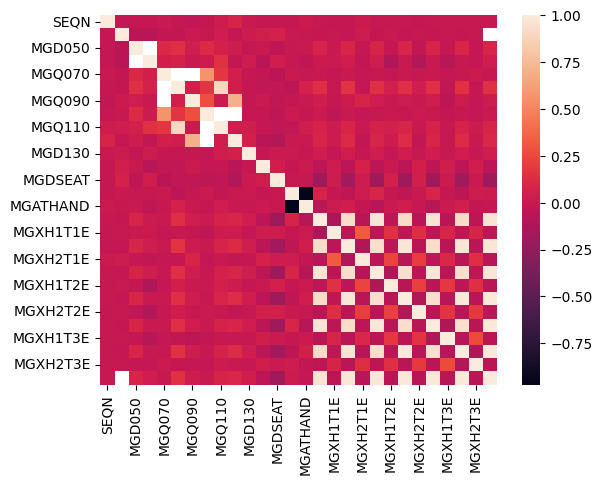

In [25]:
sns.heatmap(da_s.corr())

Here we'll select the features of interest

In [27]:
da_sec = da_s.iloc[:,10:]

<Axes: >

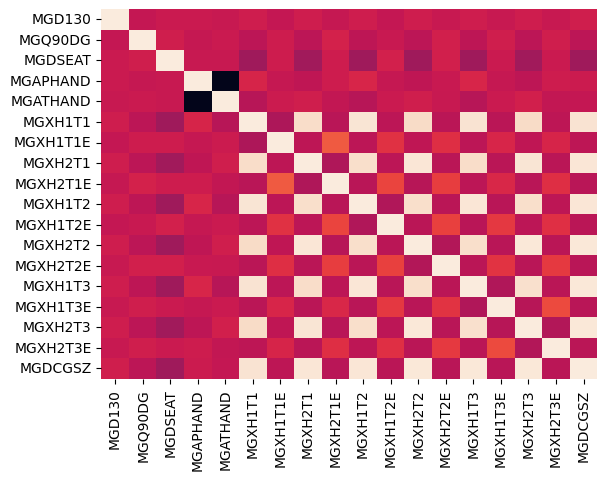

In [31]:
sns.heatmap(da_sec.corr(), cbar = False)

In [34]:
da_sec.isnull().sum()

MGD130       484
MGQ90DG      484
MGDSEAT     3080
MGAPHAND     484
MGATHAND     484
MGXH1T1      493
MGXH1T1E     493
MGXH2T1      609
MGXH2T1E     609
MGXH1T2      502
MGXH1T2E     502
MGXH2T2      619
MGXH2T2E     619
MGXH1T3      505
MGXH1T3E     505
MGXH2T3      627
MGXH2T3E     627
MGDCGSZ      614
dtype: int64

In [36]:
da_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8291 entries, 0 to 8290
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MGD130    7807 non-null   float64
 1   MGQ90DG   7807 non-null   float64
 2   MGDSEAT   5211 non-null   float64
 3   MGAPHAND  7807 non-null   float64
 4   MGATHAND  7807 non-null   float64
 5   MGXH1T1   7798 non-null   float64
 6   MGXH1T1E  7798 non-null   float64
 7   MGXH2T1   7682 non-null   float64
 8   MGXH2T1E  7682 non-null   float64
 9   MGXH1T2   7789 non-null   float64
 10  MGXH1T2E  7789 non-null   float64
 11  MGXH2T2   7672 non-null   float64
 12  MGXH2T2E  7672 non-null   float64
 13  MGXH1T3   7786 non-null   float64
 14  MGXH1T3E  7786 non-null   float64
 15  MGXH2T3   7664 non-null   float64
 16  MGXH2T3E  7664 non-null   float64
 17  MGDCGSZ   7677 non-null   float64
dtypes: float64(18)
memory usage: 1.1 MB


<Axes: >

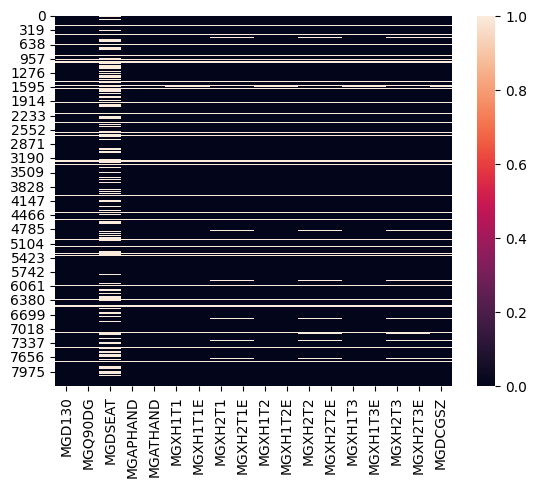

In [32]:
sns.heatmap(da_sec.isnull())

For purposes of this exercises we'll drop the null values

In [39]:
da_sec = da_sec.dropna()

In [40]:
da_sec.isnull().sum()
#no more null values! yey 

MGD130      0
MGQ90DG     0
MGDSEAT     0
MGAPHAND    0
MGATHAND    0
MGXH1T1     0
MGXH1T1E    0
MGXH2T1     0
MGXH2T1E    0
MGXH1T2     0
MGXH1T2E    0
MGXH2T2     0
MGXH2T2E    0
MGXH1T3     0
MGXH1T3E    0
MGXH2T3     0
MGXH2T3E    0
MGDCGSZ     0
dtype: int64

Are more people right dominant or left dominant?

In [43]:
left_right = {
    1: 'right handed',
    2: 'left-handed',
    3: 'use both hands equally',
    7: 'refused',
    9: 'dont know',
    '.': 'missing'
}

In [45]:
da_sec['MGD130'] = da_sec['MGD130'].replace(left_right)

As expected, most people are right handed.

In [49]:
print(da_sec['MGD130'].value_counts())
print("")
print(f"Percentage{da_sec['MGD130'].value_counts(normalize = True)}")


MGD130
right handed              4524
left-handed                400
use both hands equally     162
Name: count, dtype: int64

PercentageMGD130
right handed              0.889501
left-handed               0.078647
use both hands equally    0.031852
Name: proportion, dtype: float64


In [52]:
da_sec['MGAPHAND'] = da_sec['MGAPHAND'].replace(left_right)

Interesting enough, roughly half was assigned the right hand for the practice trial
 
Would this have an affect on the outcome?

In [54]:
da_sec['MGAPHAND'].value_counts(normalize = True)

MGAPHAND
left-handed     0.505112
right handed    0.494888
Name: proportion, dtype: float64

Roughly half started with their left hand

In [63]:
da_sec['MGATHAND'] = da_s['MGATHAND'].dropna()

da_sec['MGATHAND'] = da_sec['MGATHAND'].replace(left_right)

da_sec['MGATHAND'].value_counts(normalize=True)

MGATHAND
right handed    0.505112
left-handed     0.494888
Name: proportion, dtype: float64

In [67]:
print(f"Strongest in hand 1 test 1: {da_sec['MGXH1T1'].max()} kg") #strongest got 81.5 kg

print(f"Weakest in hand 1 test 1: {da_sec['MGXH1T1'].min()} kg") #strongest got 81.5 kg

Strongest in hand 1 test 1: 81.5 kg
Weakest in hand 1 test 1: 5.8 kg


Was the strongest left handed or right handed? Interesting

Interesting enough, the strongest person over-all in test 1 is 

In [77]:
#was the strongest right handed?? 
_ = da_sec['MGXH1T1'].argmax()

print(f"Strongest person overall is: {da_sec.iloc[_]['MGD130']}")

#did he practice with the left or right hand?
print(f"He practiced with: {da_sec.iloc[_]['MGAPHAND']}")

#what hand did he begin with?
print(f"And began the test with: {da_sec.iloc[_]['MGATHAND']}")


Strongest person overall is: right handed
He practiced with: right handed
And began the test with: left-handed
